In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#===============================================
# Small helper to keep formatting consistent.
#===============================================
hw = {
    "figsize": (9 , 4) ,
    "grid": True ,
    "legend": True ,
}

def finish(ax , title , xlabel = None , ylabel = None):
    ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    return ax

In [13]:
#========
# Setup
#========
df = pd.DataFrame({
    "month": pd.to_datetime(["2025-09-01" , "2025-10-01" , "2025-11-01" , "2025-12-01" , "2026-01-01"]) ,
    "sales_cable": [80 , 95 , 100 , 120 , 110] ,
    "sales_wire": [60 , 70 , 90 , 85 , 105] ,
})
df = df.set_index("month")
df

df2 = pd.DataFrame({
    "region": ["East" , "East" , "West" , "West" , "Central" , "Central"] ,
    "product": ["Cable" , "Wire" , "Cable" , "Wire" , "Cable" , "Wire"] ,
    "sales": [120 , 80 , 200 , 110 , 150 , 90] ,
})
df2

df3 = pd.DataFrame({
    "order_value": [120 , 250 , 80 , 400 , 150 , 90 , 600 , 220 , 180 , 75] ,
    "region": ["East" , "West" , "East" , "West" , "East" , "East" , "West" , "West" , "East" , "West"] ,
})
df3

,sales_cable,sales_wire
month,,
2025-09-01,80,60
2025-10-01,95,70
2025-11-01,100,90
2025-12-01,120,85
2026-01-01,110,105


,region,product,sales
0,East,Cable,120
1,East,Wire,80
2,West,Cable,200
3,West,Wire,110
4,Central,Cable,150
5,Central,Wire,90


,order_value,region
0,120,East
1,250,West
2,80,East
3,400,West
4,150,East
5,90,East
6,600,West
7,220,West
8,180,East
9,75,West


<Axes: title={'center': 'Case 1: Monthly sales trend (basic line)'}, xlabel='Month', ylabel='Sales'>

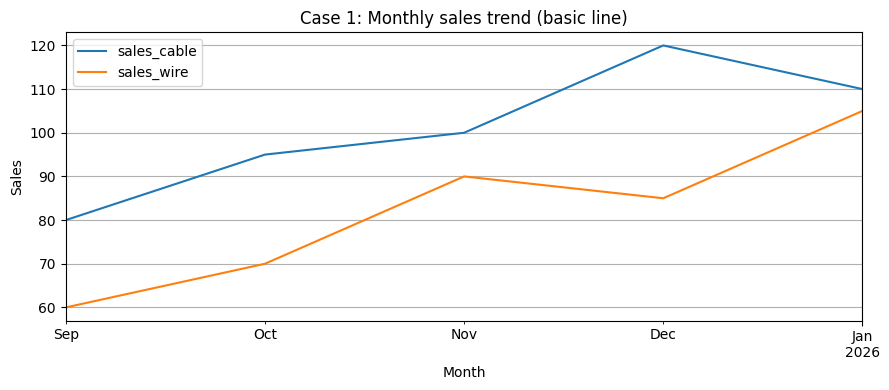

In [14]:
#============================
# Case 1) Line chart (basic)
#============================
ax = df.plot(**hw)
finish(ax , "Case 1: Monthly sales trend (basic line)" , xlabel = "Month" , ylabel = "Sales")
plt.show()

<Axes: title={'center': 'Case 2: Line chart with simple styling'}, xlabel='Month', ylabel='Sales'>

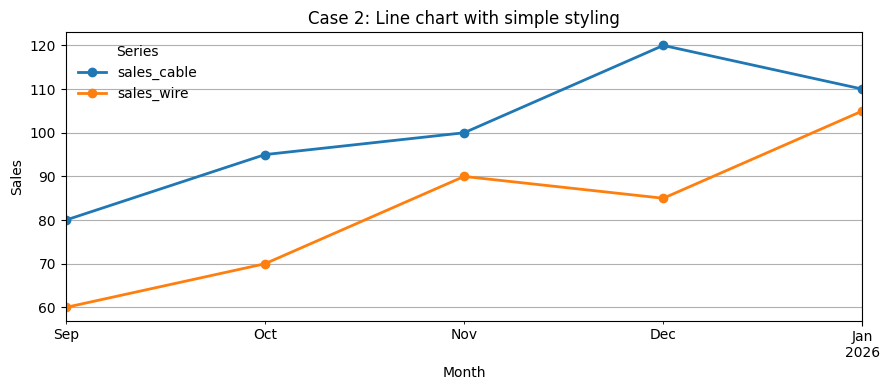

In [15]:
#================================================================
# Case 2) Line chart styling (markers, linewidth, legend title)
#================================================================
ax = df.plot(marker = "o" , linewidth = 2 , **hw)
ax.legend(title = "Series" , frameon = False)
finish(ax , "Case 2: Line chart with simple styling" , xlabel = "Month" , ylabel = "Sales")
plt.show()

<Axes: title={'center': 'Case 3: Total sales by region (bar)'}, xlabel='Region', ylabel='Total sales'>

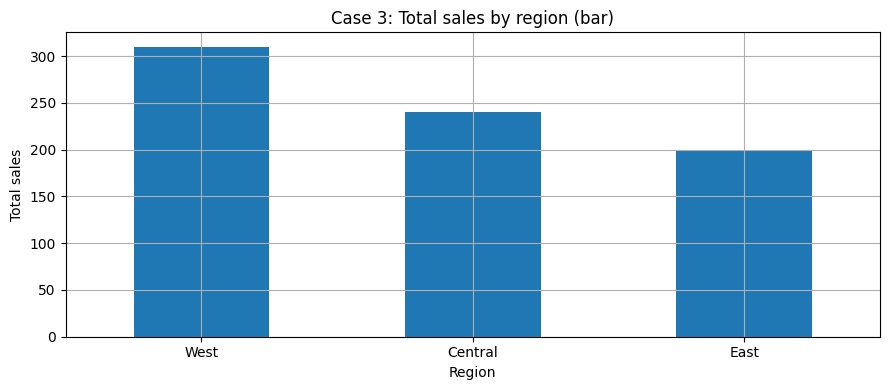

In [16]:
#==========================================
# Case 3) Bar chart (category comparison)
#==========================================
sales_by_region = df2.groupby("region" , as_index = True)["sales"].sum().sort_values(ascending = False)

ax = sales_by_region.plot(kind = "bar" , **{**hw , "legend": False})
ax.tick_params(axis = "x" , rotation = 0)
finish(ax , "Case 3: Total sales by region (bar)" , xlabel = "Region" , ylabel = "Total sales")
plt.show()

<Axes: title={'center': 'Case 4: Sales ranking (barh)'}, xlabel='Sales'>

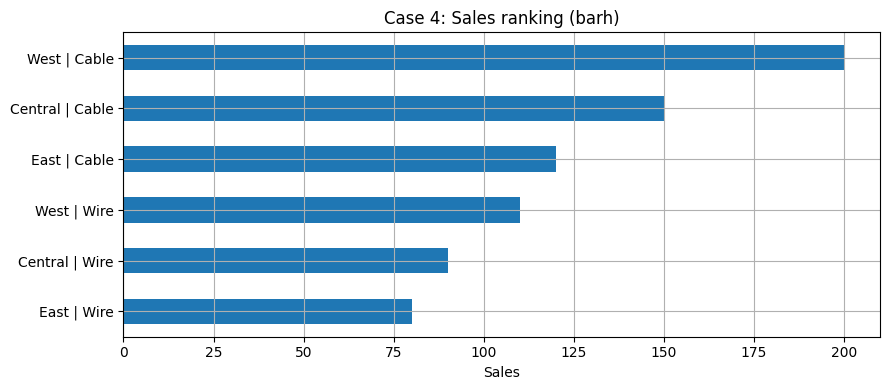

In [17]:
#==============================================
# Case 4) Barh chart (ranking + readability)
#==============================================
sales_by_product = (
    df2.groupby(["region" , "product"] , as_index = False)["sales"].sum()
    .assign(label = lambda x: x["region"] + " | " + x["product"])
    .sort_values("sales")
)

ax = sales_by_product.set_index("label")["sales"].plot(kind = "barh" , **{**hw , "legend": False})
finish(ax , "Case 4: Sales ranking (barh)" , xlabel = "Sales" , ylabel = "")
plt.show()

<Axes: title={'center': 'Case 5: Order value distribution (hist)'}, xlabel='Order value', ylabel='Count'>

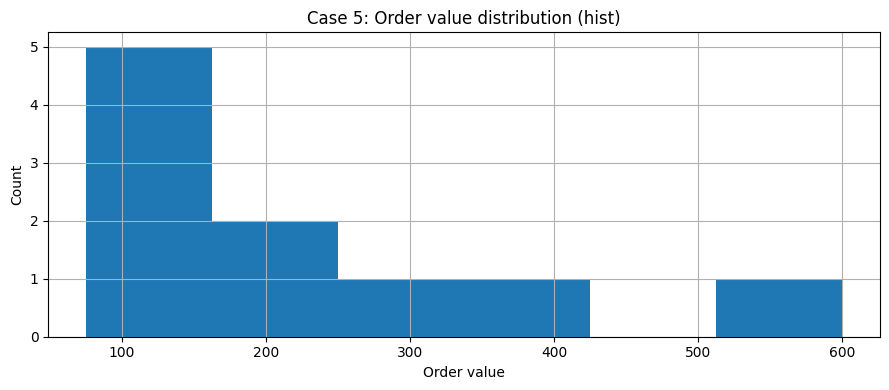

Text(0.5, 1.02, 'Case 5b: Order value distribution by region')

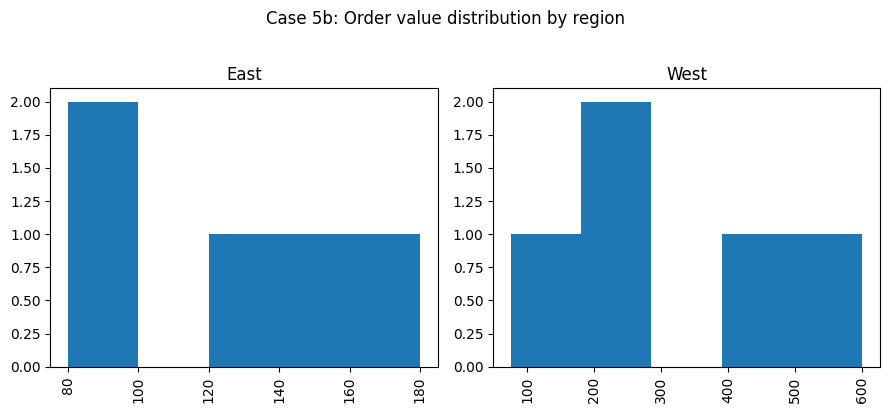

In [18]:
#====================================
# Case 5) Histogram (distribution)
#====================================
ax = df3["order_value"].plot(kind = "hist" , bins = 6 , density = False , **{**hw , "legend": False})
finish(ax , "Case 5: Order value distribution (hist)" , xlabel = "Order value" , ylabel = "Count")
plt.show()

#==================================================
# Compare distributions by region using subplots
#==================================================
ax_arr = df3.hist(column = "order_value" , by = "region" , bins = 5 , figsize = (9 , 4) ,  grid = True)
plt.suptitle("Case 5b: Order value distribution by region" , y = 1.02)
plt.tight_layout()
plt.show()